In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from colorama import Fore, Back, Style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot,iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [3]:
heart_data=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# is age and sex an indicator for death event

In [4]:
# age distribution

hist_data =[heart_data["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

* age wise 40 to 80 the spread is high
* less than 40 age and higher than 80 ge people are very low 

In [5]:
fig=px.box(heart_data,x='sex',y='age',points='all')
fig.update_layout(title_text='gnder wise age spred -male=1 female=0')

In [6]:
male=heart_data[heart_data['sex']==1]
female=heart_data[heart_data['sex']==0]

male_survi=male[heart_data['DEATH_EVENT']==0]
male_not=male[heart_data['DEATH_EVENT']==1]
female_survi=female[heart_data['DEATH_EVENT']==0]
female_not=female[heart_data['DEATH_EVENT']==1]

labels=['Male -Survived', 'Male - Not Survied', 'female- Servied','Female not survied']
values=[len(male[heart_data['DEATH_EVENT']==0]),len(male[heart_data['DEATH_EVENT']==1]),len(female[heart_data['DEATH_EVENT']==0]),
                                                   len(female[heart_data['DEATH_EVENT']==1])]
fig=go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text='Analysis on survial - gender')

# Gender factor Analysis

In [7]:
surv=heart_data[heart_data['DEATH_EVENT']==0]['age']

not_surv=heart_data[heart_data['DEATH_EVENT']==1]['age']

hist_data=[surv,not_surv]
group_labels=['Survived','Not Survived']
fig=ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text='Analysis in age on survival Status')

* Survival is high on 40 to 70 
* The spread of not survival is going through all ages.

In [8]:
fig=px.violin(heart_data,y='age',x='sex',color='DEATH_EVENT',box=True,points='all'
             ,hover_data=heart_data.columns)
fig.update_layout(title_text='Analysis in age and gender on survival status')

* Survival spred is high in ages flow of 40 to 70

* The Survival is high for both male between 50 to 60 and female's age between 60 to 70 respectively

In [9]:
fig = px.violin(heart_data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

* The Surrvival is high for not smoking person 55 to 65 , while for smoking person it is between 50 to 60
* Death event for smoking person is high than not smoking person

In [10]:
fig=px.violin(heart_data, y='age',x='diabetes',color='DEATH_EVENT',box=True,
             points='all',hover_data=heart_data.columns)
fig.update_layout(title_text='analysis in age and disabetes on survial staus')

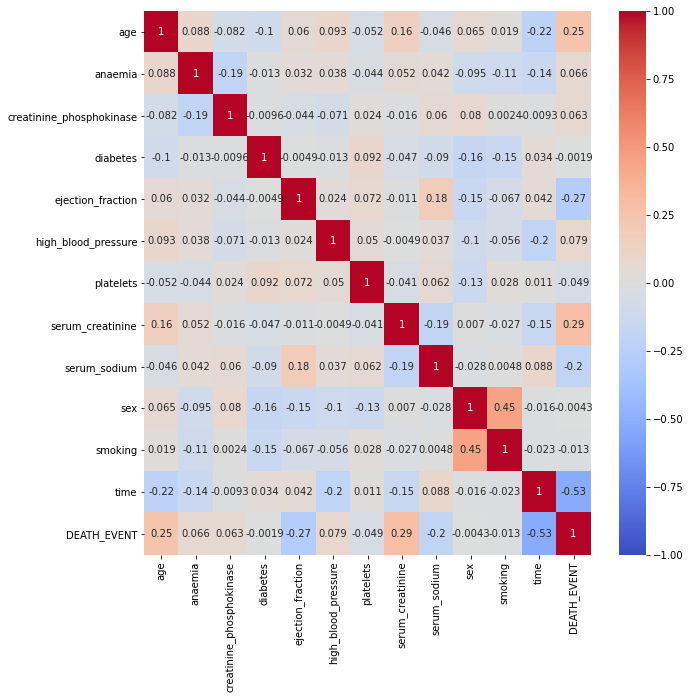

In [11]:
# Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin=-1,cmap='coolwarm',annot=True);

# Data Modeling 

In [12]:
# train test plit 

features=['time','ejection_fraction','serum_creatinine','age']
x=heart_data[features]
y=heart_data['DEATH_EVENT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2698)

In [13]:
accuracy_list=[]

# Logistic Regression

In [14]:
# logistic regression

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)
log_reg_acc=accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [15]:
print(Fore.BLUE+ 'accuracy of logistic regression is :','{:.2f}%'.format(100* log_reg_acc))

accuracy of logistic regression is : 90.00%


([<matplotlib.axis.YTick at 0x7f97f6f1f390>,
 [Text(0, 0, 'Heart not failed'), Text(0, 0, 'Heart fail')])

<Figure size 432x288 with 0 Axes>

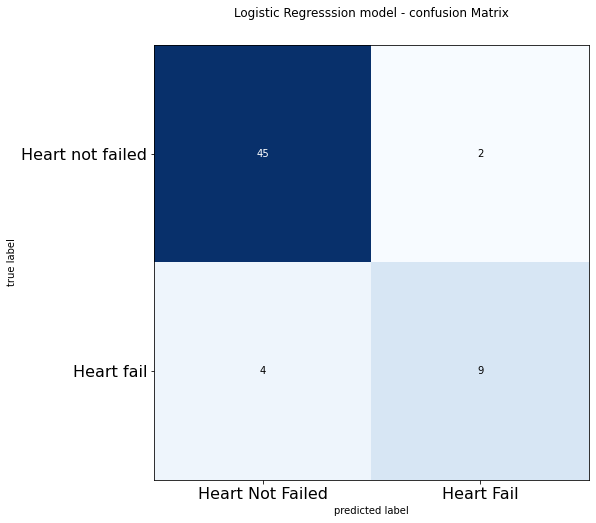

In [16]:
cm =confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Logistic Regresssion model - confusion Matrix')
plt.xticks(range(2),['Heart Not Failed','Heart Fail'], fontsize=16)
plt.yticks(range(2),['Heart not failed','Heart fail'],fontsize=16)

# SVC

In [17]:
# svc

svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test, svc_pred)
accuracy_list.append(100*svc_acc)

In [18]:
print(Fore.GREEN + 'Accuracy of svc is:','{:.2f}%'.format(100*svc_acc))

Accuracy of svc is: 91.67%


<Figure size 432x288 with 0 Axes>

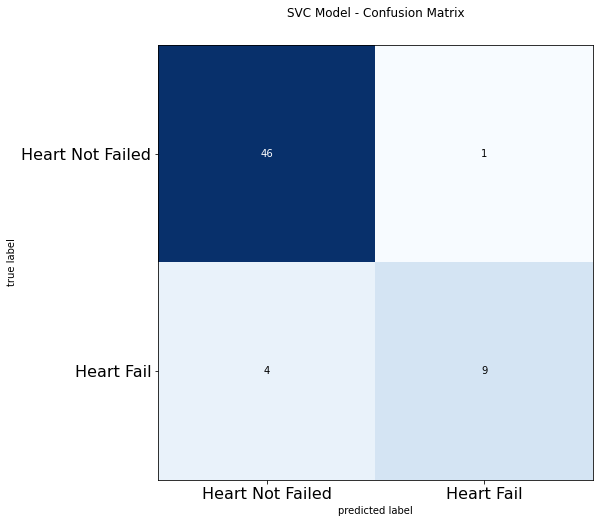

In [19]:
cm=confusion_matrix(y_test, svc_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8),hide_ticks=True,cmap=plt.cm.Blues)
plt.title('SVC Model - Confusion Matrix')
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# K neighbors classifier 

In [20]:
# K Neighbors Classifer

kn=KNeighborsClassifier(n_neighbors=6)
kn.fit(x_train,y_train)
kn_pred=kn.predict(x_test)
kn_acc=accuracy_score(y_test,kn_pred)
accuracy_list.append(100*kn_acc)

In [21]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))


Accuracy of K Neighbors Classifier is :  91.67%


<Figure size 432x288 with 0 Axes>

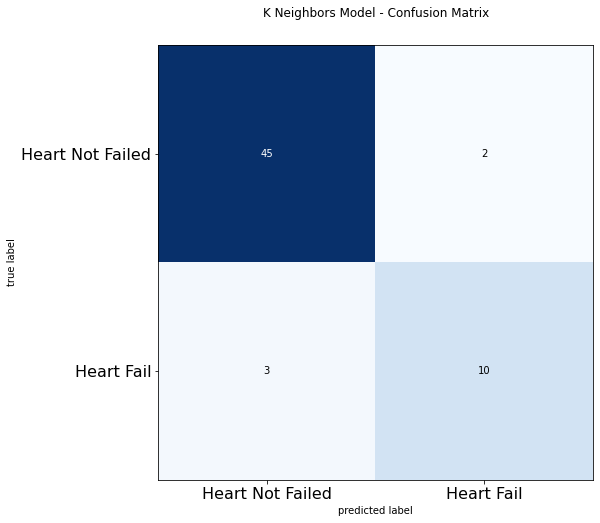

In [22]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Decision tree classifier

In [23]:
# decisio  trer classifier

dt=DecisionTreeClassifier(max_leaf_nodes=10,random_state=30,criterion='entropy')
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_acc=accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [24]:
print(Fore.GREEN +'Accuracy of decision tree classifier is : ','{:.2f}%'.format(100*dt_acc))

Accuracy of decision tree classifier is :  93.33%


([<matplotlib.axis.YTick at 0x7f97f6e06c50>,
 [Text(0, 0, 'Heart not failed'), Text(0, 0, 'Herat fail')])

<Figure size 432x288 with 0 Axes>

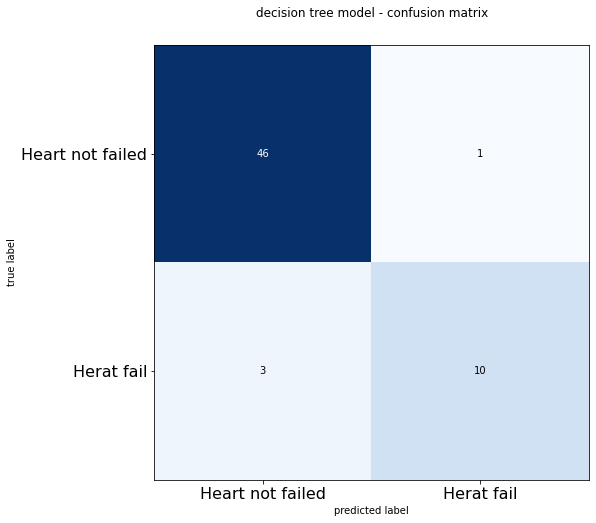

In [25]:
cm=confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("decision tree model - confusion matrix")
plt.xticks(range(2), ['Heart not failed', 'Herat fail'], fontsize=16)
plt.yticks(range(2), ['Heart not failed', 'Herat fail'], fontsize=16)

# Random Forest Classifier

In [26]:
# random forest classifier 

rfc=RandomForestClassifier(max_features=0.5,max_depth=15, random_state=1)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
rfc_acc=accuracy_score(y_test,rfc_pred)
accuracy_list.append(100*rfc_acc)


In [27]:
print(Fore.GREEN+' Accuracy of random forest classifier is : ','{:.2f}%'.format(100*rfc_acc))

 Accuracy of random forest classifier is :  96.67%


<Figure size 432x288 with 0 Axes>

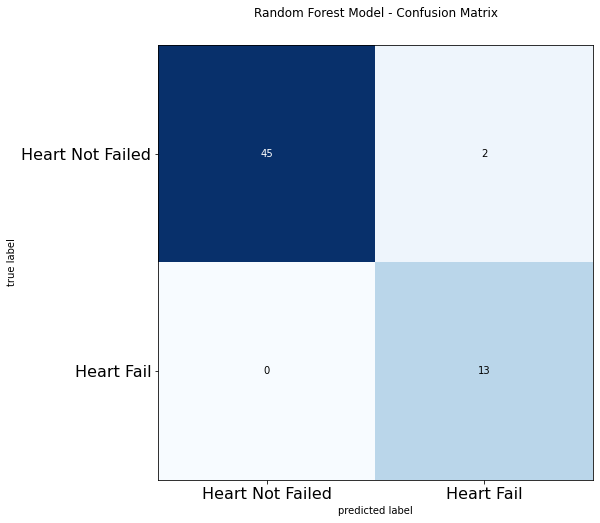

In [28]:
cm = confusion_matrix(y_test, rfc_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Gradient Boosting classifier

In [29]:
# Gradient boosting 

GB=GradientBoostingClassifier(max_depth=2,random_state=4)
GB.fit(x_train,y_train)
GB_pred=GB.predict(x_test)
GB_acc=accuracy_score(y_test,GB_pred)
accuracy_list.append(100*GB_acc)

In [30]:
print(Fore.GREEN +'accuray of gradient boosting is :','{:.2f}%'.format(100*GB_acc))

accuray of gradient boosting is : 95.00%


<Figure size 432x288 with 0 Axes>

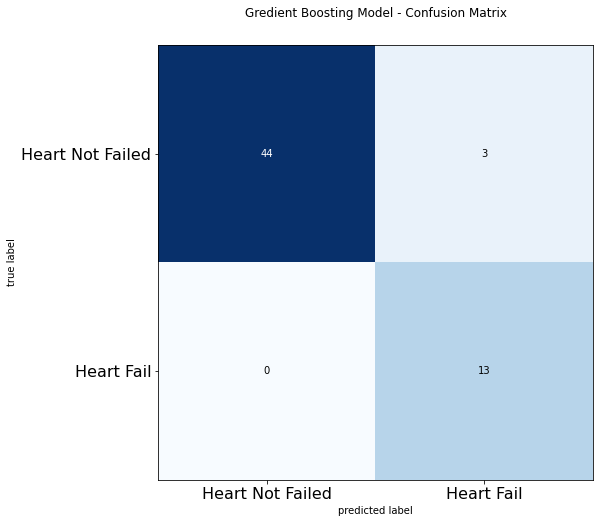

In [31]:
cm = confusion_matrix(y_test, GB_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [32]:
model_list=['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster']

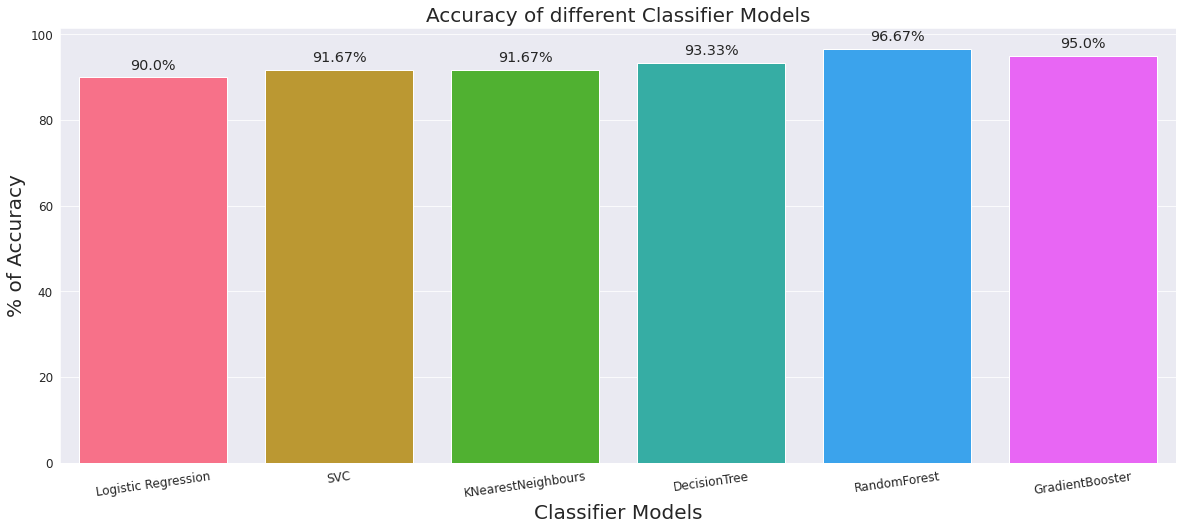

In [33]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()
